<a href="https://colab.research.google.com/github/0v0n1/Data-Science/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
)

# Set plot style
sns.set_style("whitegrid")

#Loading Dataset

In [ ]:
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#Exploratory Data Analysis

In [ ]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
print("Dataset Description:")
df.describe()

Dataset Description:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
print()
S=df.isnull().sum()
print("Checking for missing values:")
print(S)
print("Total: ", S.sum())


Checking for missing values:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
Total:  1759


#Analyzing Target values

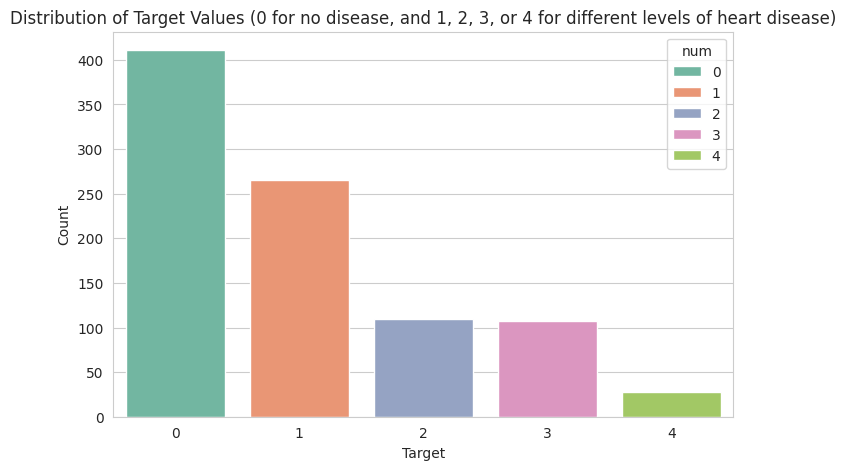

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="num", data=df, hue="num", palette="Set2")
plt.title("Distribution of Target Values(0 for no disease, and 1, 2, 3, or 4 for different levels of heart disease)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

Insights: The graph shows slightly higher number of patients having heart disease.

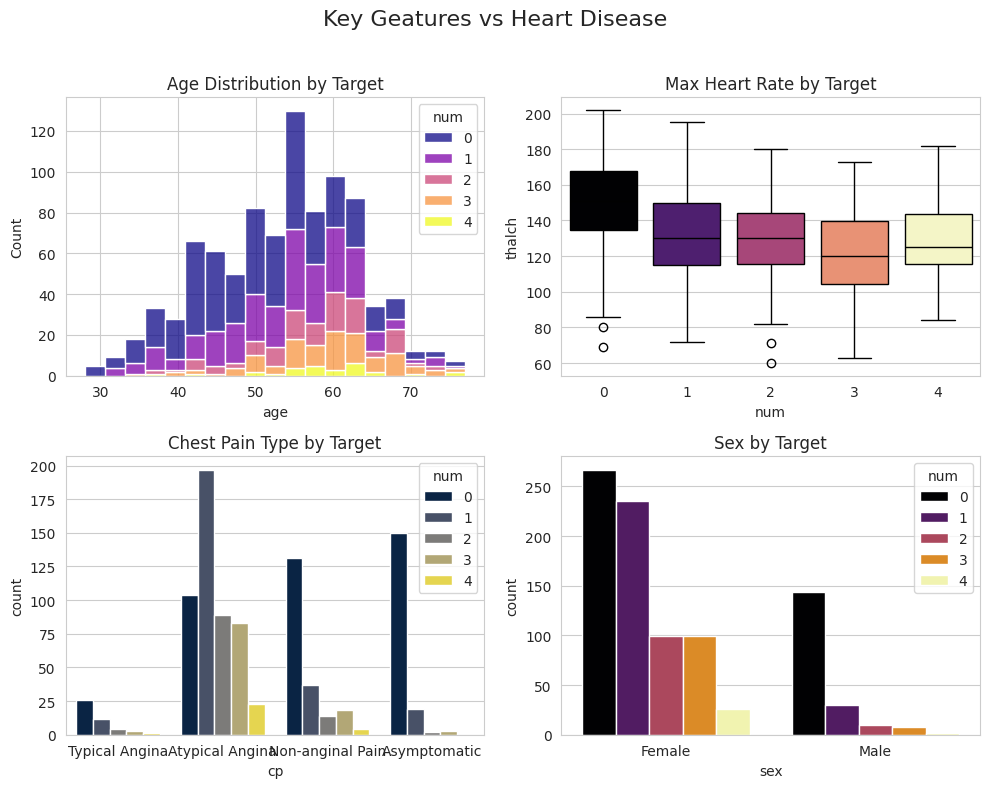

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Key Geatures vs Heart Disease", fontsize=16)
sns.histplot(
    ax=axs[0, 0], data=df, x="age", hue="num", multiple="stack", palette="plasma"
).set_title("Age Distribution by Target")

# Max Heart Rate vs. Target
sns.boxplot(
    ax=axs[0, 1],
    data=df,
    x="num",
    y="thalch",
    palette="magma",
    hue="num",
    legend=False,
).set_title("Max Heart Rate by Target")

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axs[1, 0], data=df, x="cp", hue="num", palette="cividis")
cp_plot.set_title("Chest Pain Type by Target")
cp_plot.set_xticks(range(len(df["cp"].unique())))
cp_plot.set_xticklabels(
    ["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"]
)

# Sex vs. Target
sex_plot = sns.countplot(ax=axs[1, 1], data=df, x="sex", hue="num", palette="inferno")
sex_plot.set_title("Sex by Target")
sex_plot.set_xticks(range(len(df["sex"].unique())))
sex_plot.set_xticklabels(["Female", "Male"])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Insights:

* **Max Heart Rate (thalach)**: Patients
with heart disease tend to have a lower maximum heart rate.
* **Chest Pain (cp)**: Patients with chest pain types 1 and 2 (Atypical and Non-anginal) are more likely to have heart disease. Surprisingly, those with type 0 (Typical Angina) are less likely, and those with asymptomatic pain (type 3) are very likely to have the disease.
* **Sex**: A higher proportion of females in this dataset have heart disease compared to males.

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

#Data Preprocessing

In [ ]:
df["num"]=df["num"].apply(lambda x: 0 if x == 0 else 1)

In [ ]:

# Define features (X) and target (y)
X = df.drop("num", axis=1)
y = df["num"]

# Drop the 'id' and 'dataset' columns as they are not features
X = X.drop(["id", "dataset"], axis=1)

# Identify categorical and numerical features
categorical_features = [col for col in X.columns if X[col].dtype == "object"]
numerical_features = [col for col in X.columns if X[col].dtype != "object"]

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

for col in numerical_features:
    mean_value = X[col].mean()
    X[col].fillna(mean_value, inplace=True)

for col in categorical_features:
    mode_value = X[col].mode()[0]
    X[col].fillna(mode_value, inplace=True)

Numerical features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


/tmp/ipython-input-1783670030.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(mean_value, inplace=True)
/tmp/ipython-input-1783670030.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
# Convert object columns to category type for one-hot encoding
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standard scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model Training

##Model 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=42)
lr.fit(X_train_scaled,y_train)
y_pred_lr=lr.predict(X_test_scaled)

##Model 2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled,y_train)
y_pred_dt=dt.predict(X_test_scaled)

##Model 3: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled,y_train)
y_pred_rf=rf.predict(X_test_scaled)

##Model 4: Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm=SVC(random_state=42)
svm.fit(X_train_scaled,y_train)
y_pred_svm=svm.predict(X_test_scaled)

##Model 5: K-Nearest Neighbours (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pred_knn=knn.predict(X_test_scaled)

##Model 6: Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled,y_train)
y_pred_gb=gb.predict(X_test_scaled)

##Model 7: Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train_scaled,y_train)
y_pred_nb=nb.predict(X_test_scaled)

#Model Evaluation

In [ ]:
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- Decission Tree Performance ---")
print(classification_report(y_test, y_pred_dt, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

print("\n--- Gradient Boosting Performance ---")
print(classification_report(y_test, y_pred_gb, zero_division=0))

print("\n--- Naive Bayes Performance ---")
print(classification_report(y_test, y_pred_nb, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        82
           1       0.82      0.87      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.82      0.82      0.82       184


--- Decission Tree Performance ---
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        82
           1       0.78      0.85      0.82       102

    accuracy                           0.79       184
   macro avg       0.79      0.78      0.78       184
weighted avg       0.79      0.79      0.79       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        82
           1       0.84      0.90      0.87       102

    accuracy                           0.85       184
   macro avg     

Insight on each model's performance:

* ***Logistic Regression***: Pretty good overall, with balanced precision and recall for both classes.
* ***Decision Tree***: Slightly less accurate than Logistic Regression, especially in recalling instances of no heart disease.
* ***Random Forest***: One of the better performers, with high precision and recall for both classes.
* ***Support Vector Machine (SVM)***: Also performed well, with high recall for heart disease cases but slightly lower recall for no heart disease cases.
* ***K-Nearest Neighbors (KNN)***: Similar performance to SVM, with good balance between precision and recall.
* ***Gradient Boosting***: The best performing model among all, with high precision and recall for both classes.
* ***Naive Bayes***: Decent performance, with balanced precision and recall.

    In short, Gradient Boosting appear to be the most accurate models for this dataset.

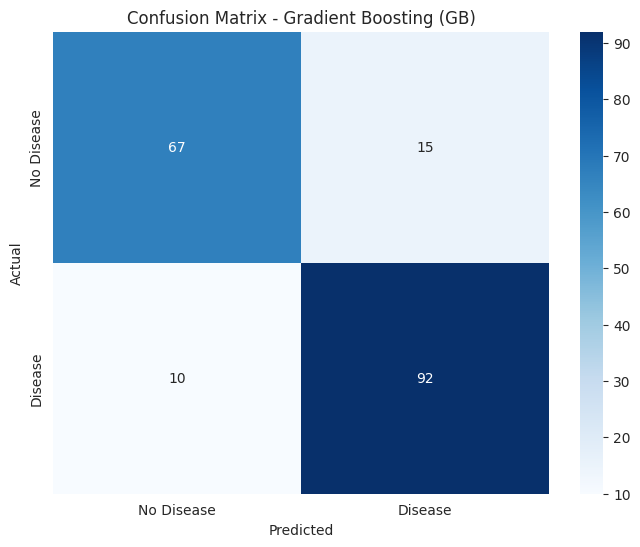

In [ ]:
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Disease", "Disease"],
    yticklabels=["No Disease", "Disease"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting (GB)")
plt.show()

#Feature Importance
(Used for Random Forest Classifier)

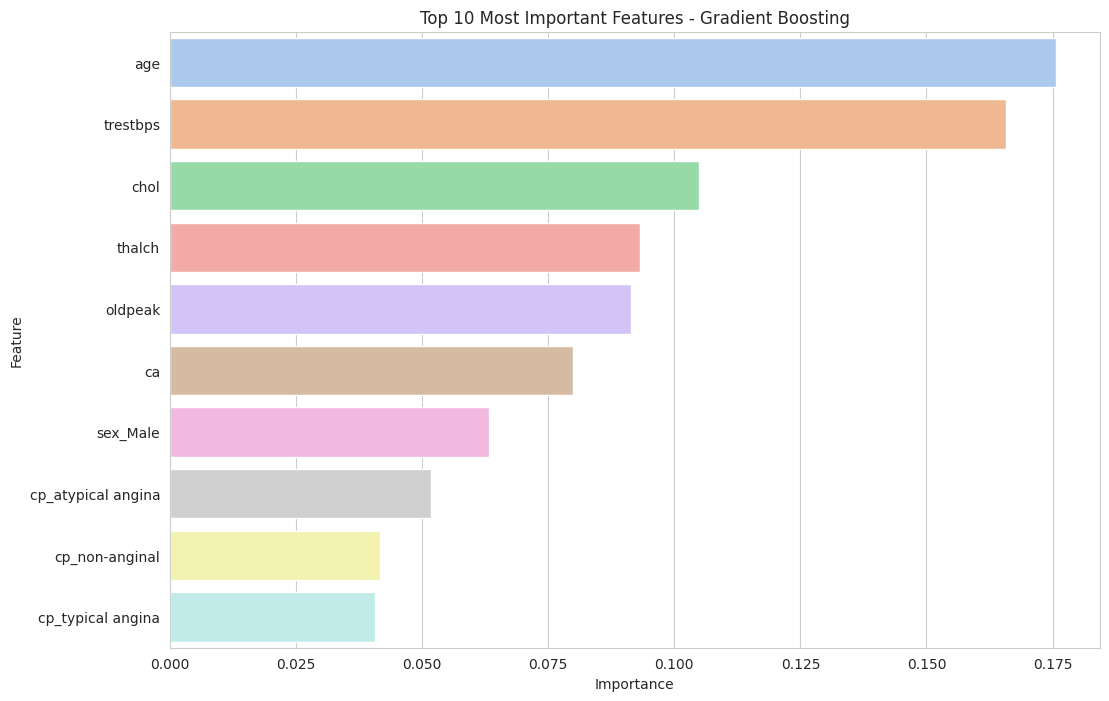

In [ ]:
# Get feature importances from the trained model
importances = pd.Series(gb.feature_importances_, index=X.columns).sort_values(
    ascending=False
)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": importances}
)
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df,
    palette="pastel",
    hue="Feature",
    legend=False,
)
plt.title("Top 10 Most Important Features - Gradient Boosting")
plt.show()

Insights:

Exang and Chol are the most important features: The features related to exercise induced angina (exang_True) and serum cholesterol (chol) are the strongest indicators of heart disease according to the Gradient Boosting model.
Age and Oldpeak are also significant: Age and oldpeak (ST depression induced by exercise relative to rest) are the next most important features, suggesting they play a considerable role in predicting heart disease.
Several other features contribute: While less impactful than the top features, factors like cp_atypical angina, ca, thalch, cp_non-anginal, trestbps, and sex_Male also contribute to the model's prediction of heart disease.

Insights from Random Forest Feature Importance:

1.  **Key Predictors:** `ca`, `thalach`, `thal`, and `cp` are identified as the most important predictors of heart disease.
2.  **Alignment with Intuition:** These findings match the initial exploratory data analysis (EDA) and medical understanding of heart disease factors.
3.  **Validation:** This analysis confirms the critical role of these features in diagnosing heart disease, even though another model (SVM) had slightly better overall performance.